In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sbn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
dataset = loadmat("NumberRecognition.mat")

In [6]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'imageArrayTraining0', 'imageArrayTraining1', 'imageArrayTraining2', 'imageArrayTraining3', 'imageArrayTraining4', 'imageArrayTraining5', 'imageArrayTraining6', 'imageArrayTraining7', 'imageArrayTraining8', 'imageArrayTraining9', 'imageArrayTesting0', 'imageArrayTesting1', 'imageArrayTesting2', 'imageArrayTesting3', 'imageArrayTesting4', 'imageArrayTesting5', 'imageArrayTesting6', 'imageArrayTesting7', 'imageArrayTesting8', 'imageArrayTesting9'])

In [9]:
eights = dataset["imageArrayTraining8"]
nines = dataset["imageArrayTraining9"]

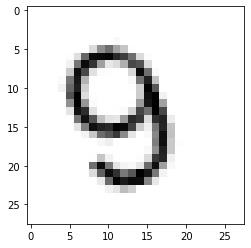

In [10]:
img = nines[:,:,1]
plt.imshow(img, cmap="Greys")

In [11]:
y_eights = np.zeros(eights.shape[-1])
y_nines = np.ones(nines.shape[-1])

In [12]:
concatenated = np.concatenate([eights,nines], axis = 2)

In [14]:
concatenated.shape

(28, 28, 1500)

In [15]:
transposed =concatenated.transpose([2,0,1])

In [16]:
transposed.shape

(1500, 28, 28)

In [18]:
reshaped =transposed.reshape(1500,784)
reshaped.shape

(1500, 784)

In [20]:
y_concatenated = np.concatenate([y_eights,y_nines])
y_concatenated.shape

(1500,)

In [21]:
X = reshaped
y = y_concatenated

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [23]:
y_concatenated[0]

0.0

In [24]:
y_concatenated[-1]

1.0

In [34]:
error_rate = []
for i in range(1,21):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

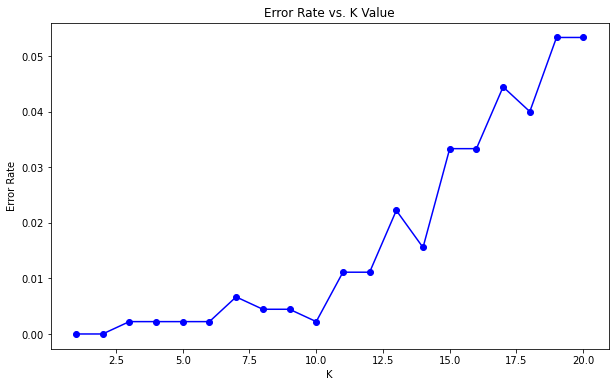

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate, color='blue',marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))
print("Maximum error:",max(error_rate),"at K =",error_rate.index(max(error_rate)))

Minimum error: 0.0 at K = 0
Maximum error: 0.05333333333333334 at K = 18


In [29]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [30]:
pred

array([0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0.